Some exercises for the problem solving session

Problem from group assignment 1: what is the expected number of coin tosses before the first head appears? Let's say we have computed it and want to check if it is reasonable: use simulation!

In [3]:
import numpy as np



In [4]:
n = 100000
# store a sequence of required attempts in n trials
all_req_attempts = np.array([])
for i in range(n):
  # required attempts in a current run
  req_attempts = 0
  
  while(1):
    head_or_coin = np.random.choice(2, 1)
    req_attempts = req_attempts + 1
    if(head_or_coin == 1):
      # when we finally got a head, remember the number of attempts
        all_req_attempts = np.append(all_req_attempts, req_attempts)
        break


all_req_attempts.mean()

2.00009

Chapter 1, problem 5

## Problem 5, Chap 1

In [7]:
import numpy as np

In [8]:
# the function returns True if we have obtained 2 heads, say head = 1 and tail = 0
def true_event(sequence):
    # check first if the sequence has 2 heads:
    if (np.sum(sequence) == 2):
        # if yes, check if the last element of the sequence was 1 - then the sequence is correct
        if (sequence[-1] == 1):
            return 1
    # otherwise, we got our number wrong
    return 0

In [9]:
k = 4
# randint (a, b) generates random numbers in [a, b) ! so b is not included
# generate a sequence of outcomes of size k = 4
x = np.random.randint(0,2,size=k)

print(x)
true_event(x)

[0 1 0 0]


0

Now define a function that takes a vector of sequences and for each returns true or false

In [11]:
def true_event_vector(sequence):
    return (np.sum(x,axis=1) == 2)*(x[:,-1] == 1)

In [12]:
k_max = 4

x = np.random.randint(0,2,size=(10000000,k))
x

array([[0, 1, 1, 1],
       [1, 1, 1, 0],
       [0, 1, 1, 1],
       ...,
       [1, 1, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

Empirically compute the probability (the fraction of 1s in the obtained sequence)

In [14]:
np.mean(true_event_vector(x))

0.1877161

What is the actual probability that k trials required? Hint: what is the probability of obtaining exactly 1 head in k-1 trials?

In [16]:
p = 1/2
(k-1)*((1-p)**(k-2)*p)*p

0.1875

## Problem 10, Chap 1

In [18]:
import numpy as np

In [19]:
# the door can take values 1, 2, 3
door = np.random.randint(1,4,size=100000)
#print(door)
# we pick the 1st door 
np.mean(door == 1) # Probability of getting a price when not switching

0.33179

Now let's compute the probability of changing to another door

In [21]:
from random import randint
host = [] # Door opened by host
for d in door:
    if (d == 1):
        # Randomly open either 2 or 3
        host.append(randint(2,3))
    elif (d == 2):
        host.append(3)
    elif (d == 3):
        host.append(2)

In [22]:
randint(2,3)

3

In [24]:
switch_success = [] # If switching was a success
for d,h in zip(door,host):
    if (h == 2) and d==3: # Switching from 1 to 3 was a success
        switch_success.append(1)
    elif (h == 3) and d==2: # Switching from 1 to 2 was a success
        switch_success.append(1)
    else:
        switch_success.append(0)

In [25]:
np.mean(switch_success)

0.66821

Problem from group assignment 1: What is the CDF and PDF of R = sqrt(X^2 + Y^2) where X and Y are uniformly distributed on a unit disc. Let's simulate the points first

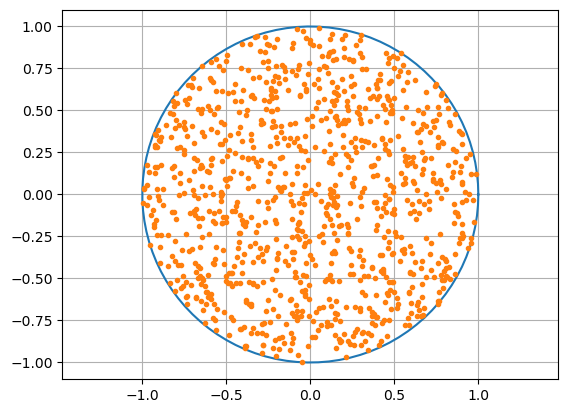

In [27]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
r = np.random.uniform(low=0, high=1, size=n)  # radius
theta = np.random.uniform(low=0, high=2*np.pi, size=n)  # angle

# Polar coordinates transformation
x = np.sqrt(r) * np.cos(theta)
y = np.sqrt(r) * np.sin(theta)

# make the line
a = np.linspace(0, 2*np.pi, 100)
# perform a transformation to do a circle
cx,cy = np.cos(a), np.sin(a)

fg, ax = plt.subplots(1, 1)
ax.plot(cx, cy,'-') # draw unit circle line
ax.plot(x, y, '.') # plot random points
ax.axis('equal')
ax.grid(True)
fg.canvas.draw()
plt.show()

Now let's look at R:

In [29]:
r = np.sqrt(x**2 + y**2)
r

array([0.61703934, 0.57658776, 0.46124224, 0.83918722, 0.71646007,
       0.30561193, 0.91937842, 0.48440761, 0.11683626, 0.44461279,
       0.76473072, 0.93052509, 0.62969567, 0.98327077, 0.27951106,
       0.91399854, 0.89199113, 0.61591954, 0.91330289, 0.25667046,
       0.53001382, 0.73372564, 0.63135599, 0.5474012 , 0.79768248,
       0.67547469, 0.6022186 , 0.47185447, 0.52817741, 0.6578934 ,
       0.57279057, 0.25882261, 0.3347166 , 0.28921626, 0.68859506,
       0.47455846, 0.466171  , 0.93193007, 0.72580018, 0.11747271,
       0.68651113, 0.62950632, 0.81854734, 0.43159736, 0.88445093,
       0.7770611 , 0.15043503, 0.89389836, 0.73009305, 0.25954921,
       0.90089343, 0.72190776, 0.27162539, 0.41775782, 0.98614953,
       0.63875286, 0.62506601, 0.67302261, 0.24283528, 0.79017721,
       0.62650669, 0.19695941, 0.94482426, 0.29067407, 0.71578934,
       0.283939  , 0.98601583, 0.17040119, 0.92379799, 0.90598356,
       0.44305075, 0.95234273, 0.92234158, 0.25958597, 0.51155

Check histogram of R

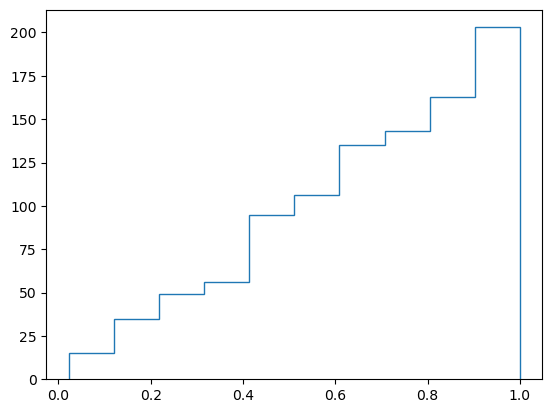

In [31]:
counts, bins = np.histogram(r)
plt.stairs(counts, bins)
plt.show()

Check the PMF and CDF; Use the Utils script to make and plot the empirical distribution

In [40]:
from Utils import makeEDF, plotEDF

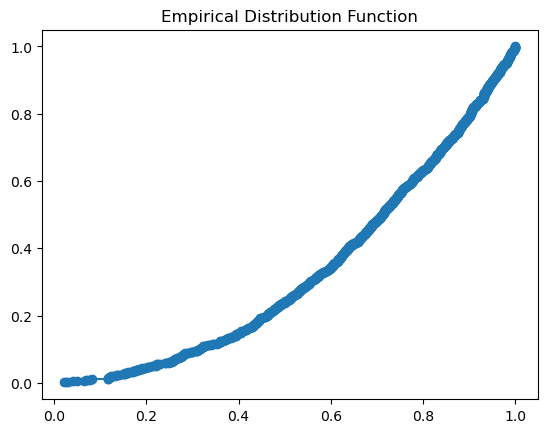

In [42]:
my_edf = makeEDF(r)
my_edf

plotEDF(my_edf)

In [ ]:
r.mean()

Some work with text parsing

In [50]:
csv_file = open('breast-cancer.csv', 'r')

# read the whole data line by line
all_lines = csv_file.readlines()

# obtain a list, each element of which is a single line from the imported csv file 

all_lines



['id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst\n',
 '842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189\n',
 '842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902\n',
 '84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456

In [52]:
all_lines[0]

'id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst\n'

We see that there is a line break in the end, how to get rid of it?

In [54]:
all_lines[0].strip()

'id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst'